In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
sys.path.append(os.path.join(os.getcwd(),'..'))
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
e = 1.602e-19
f_ring = 7.5e6# Hz

$\epsilon_F=\frac{p}{\sqrt{\text{Number of events in one chunk}}}$

The idea: we want to have a reasonably high number of values of the Fano factor `n_of_F_values`, for example 50. So that we can plot a hystogram for the values of Fano factor. Then this script calculates how long should the HydraHarp file be, to achieve certain error in the Fano factor $\epsilon_F$, `relative_desired_error` or `absolute_desired_error`. The main input parameter is `p` - probability to emit a photon per pass (measured or predicted). `p` can be for one electron or for multiple electrons in the ring.

In [7]:
p1_theory =  8.18e-3 # for one electron
rate = 30000 #cps
p = [p1_theory, rate/f_ring][0]
n_of_F_values = n_of_chunks = 50
absolute_desired_error = 0.0001
relative_desired_error = [0.01, absolute_desired_error/p][0] # in units of p
n_events_in_one_chunk = (1/relative_desired_error)**2
n_events_in_file = n_of_chunks*n_events_in_one_chunk
n_revolutions_in_file = n_events_in_file/p
t_file = n_revolutions_in_file/f_ring
print("required file length = {:.3f} sec".format(t_file))

required file length = 8.150 sec


This plots the SPAD rate as a function of the number of electrons in the ring, given a certain value of `p1` - probability for one electron to emit a photon per pass (measured or predicted).

The probability to have a count during one turn is 
$$p = 1-(1-p_1)^{n_e}\approx 1-\exp{(-p_1 n_e)}$$

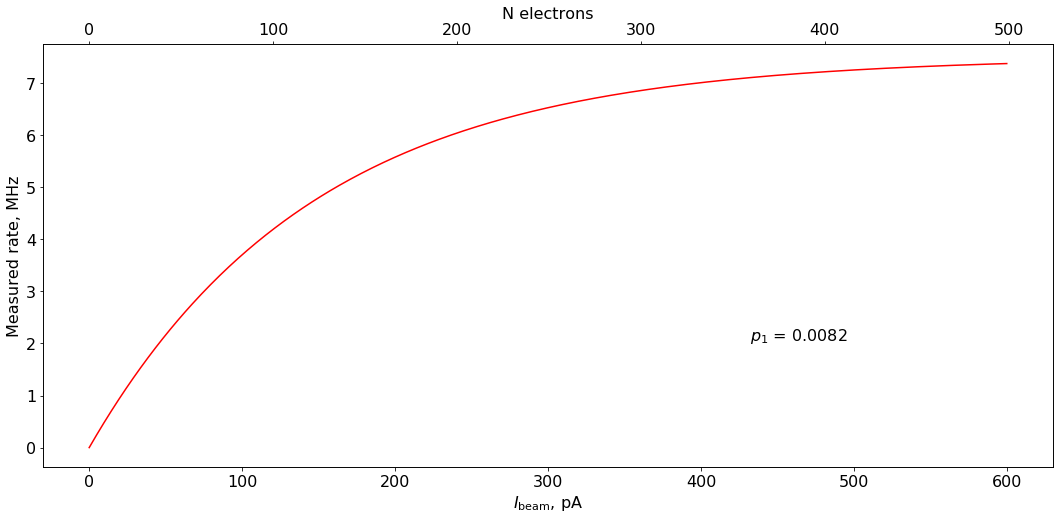

In [9]:
p1=[p1_theory,0.003][0] # p for one electron
N_to_i = f_ring*e*1e12
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$I_\mathrm{beam}$, $\mathrm{pA}$')
ax1.set_ylabel('Measured rate, MHz')
n_e = np.arange(500)
rates = f_ring*(1-np.exp(-p1*n_e))*1e-6
ax1.plot(N_to_i*n_e,rates,color='red')
ax2 = ax1.twiny()
ax2.set_xlabel('N electrons')  # we already handled the x-label with ax1
ax1min,ax1max = ax1.get_xlim()
ax2.set_xlim(ax1min/N_to_i,ax1max/N_to_i)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.text(0.7,0.3,r'$p_1$'+r' = {:.4f}'.format(p1),transform=ax1.transAxes)
plt.show()

Picomotor parameters

In [1]:
picomotor_speed_mm_min = 1.2 # mm/min
picomotor_speed_mm_sec = picomotor_speed_mm_min/60
distance = 0.1 # mm
print("it takes {} sec to move by {} mm".format(distance/picomotor_speed_mm_sec,distance))
picomotor_speed_mm_step = 25.4/2e6
print("it takes {} steps to move by {} mm".format(distance//picomotor_speed_mm_step,distance))

it takes 5.0 sec to move by 0.1 mm
it takes 7874.0 steps to move by 0.1 mm


In [2]:
transverse_size = 0.1 #mm
z_spot_size_mm = transverse_size*180/25.4
print("characteristic longitudinal size of the light spot = {:.3f} mm".format(z_spot_size_mm))
full_length_spad_stepper_mm = 100
z_spot_size_steps_stepper = 1670/full_length_spad_stepper_mm*z_spot_size_mm
print("this convertes to roughly {:.1f} steps".format(z_spot_size_steps_stepper))

characteristic longitudinal size of the light spot = 0.709 mm
this convertes to roughly 11.8 steps


In [3]:
1670/full_length_spad_stepper_mm

16.7

In [5]:
830000/36

23055.555555555555